In [ ]:
# Dataset of compulsary schools in Sweden schoolyear 2018-2019
# Assembled by Martin Bergman, 2020
# martinbergman@home.se

In [1]:
# Library imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math, datetime


In [2]:
# Load dataset from file

school_dataset = pd.read_excel('school_dataset_final.xlsx', index_col=0)
school_dataset.describe()


,organizer_mun,organizer_ind,n_pupils,f_girls,f_foreign,f_education,n_teachers,f_staff_female,f_staff_ped_degree,pupils_per_teacher,f_staff_permanent,mun_population,mun_density,mun_age,f_mun_foreign,mun_income
count,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000
mean,0.727756,0.272244,73.942895,0.486341,25.151129,57.359336,28.325620,68.412075,79.752191,12.300734,83.262981,169862.061753,738.750398,41.343161,0.187770,280.405511
std,0.445263,0.445263,43.909096,0.070905,20.999741,16.619696,13.134205,10.053689,11.969771,2.691662,11.990965,266800.602598,1461.934035,2.494258,0.076897,29.124618
min,0.000000,0.000000,10.000000,0.232558,0.000000,14.000000,0.600000,25.000000,16.700000,3.900000,16.700000,2450.000000,0.200000,36.400000,0.065415,220.700000
25%,0.000000,0.000000,42.000000,0.444444,10.325000,44.825000,18.800000,62.100000,73.300000,10.700000,77.325000,27373.000000,33.150000,39.100000,0.124234,260.500000
50%,1.000000,0.000000,66.000000,0.486341,19.200000,56.400000,26.050000,68.900000,81.900000,12.000000,85.150000,63630.000000,98.350000,40.900000,0.176938,275.100000
75%,1.000000,1.000000,102.000000,0.525424,32.400000,70.375000,35.475000,75.300000,88.200000,13.600000,91.700000,141062.500000,479.800000,43.200000,0.251817,296.400000
max,1.000000,1.000000,449.000000,0.734513,99.000000,100.000000,97.900000,100.000000,100.000000,60.500000,100.000000,962154.000000,5818.600000,49.800000,0.421058,361.300000


In [3]:
#Dataset information

school_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 57317316 to 32380381
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   organizer_mun       1506 non-null   int64  
 1   organizer_ind       1506 non-null   int64  
 2   n_pupils            1506 non-null   int64  
 3   f_girls             1506 non-null   float64
 4   f_foreign           1506 non-null   float64
 5   f_education         1506 non-null   float64
 6   n_teachers          1506 non-null   float64
 7   f_staff_female      1506 non-null   float64
 8   f_staff_ped_degree  1506 non-null   float64
 9   pupils_per_teacher  1506 non-null   float64
 10  f_staff_permanent   1506 non-null   float64
 11  mun_population      1506 non-null   int64  
 12  mun_density         1506 non-null   float64
 13  mun_age             1506 non-null   float64
 14  f_mun_foreign       1506 non-null   float64
 15  mun_income          1506 non-null   float64


In [4]:
#Scale the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(school_dataset.drop('f_eligible', axis=1))

school_dataset_scaled = pd.DataFrame(scaled, columns=school_dataset.drop('f_eligible', axis=1).columns, index=school_dataset.drop('f_eligible', axis=1).index)
school_dataset_scaled['f_eligible']=school_dataset['f_eligible']
school_dataset_scaled.describe()


,organizer_mun,organizer_ind,n_pupils,f_girls,f_foreign,f_education,n_teachers,f_staff_female,f_staff_ped_degree,pupils_per_teacher,f_staff_permanent,mun_population,mun_density,mun_age,f_mun_foreign,mun_income
count,1506.000000,1506.000000,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03
mean,0.000000,0.000000,-7.548927e-17,-1.604147e-16,-9.436159e-18,-7.313023e-17,3.019571e-16,4.293452e-16,-6.416588e-16,-1.698509e-16,-2.170316e-16,-9.436159e-18,-2.830848e-17,-1.830615e-15,1.981593e-16,-1.811742e-15
std,1.000332,1.000332,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00
min,-1.634983,-0.611627,-1.456740e+00,-3.580396e+00,-1.198085e+00,-2.609779e+00,-2.111649e+00,-4.319459e+00,-5.269368e+00,-3.122058e+00,-5.552938e+00,-6.276885e-01,-5.053550e-01,-1.982474e+00,-1.591683e+00,-2.050683e+00
25%,-1.634983,-0.611627,-7.277195e-01,-5.910862e-01,-7.062494e-01,-7.544361e-01,-7.254938e-01,-6.280452e-01,-5.392195e-01,-5.948987e-01,-4.953691e-01,-5.342431e-01,-4.828089e-01,-8.996284e-01,-8.265167e-01,-6.836870e-01
50%,0.611627,-0.611627,-1.809542e-01,7.048405e-15,-2.834847e-01,-5.774198e-02,-1.733166e-01,4.854809e-02,1.794957e-01,-1.117652e-01,1.574223e-01,-3.983025e-01,-4.381956e-01,-1.777313e-01,-1.409034e-01,-1.822264e-01
75%,0.611627,1.634983,6.391939e-01,5.513765e-01,3.453033e-01,7.834071e-01,5.445137e-01,6.853418e-01,7.059963e-01,4.828606e-01,7.038484e-01,-1.079800e-01,-1.771875e-01,7.446927e-01,8.331759e-01,5.493566e-01
max,0.611627,1.634983,8.544510e+00,3.501230e+00,3.517824e+00,2.566523e+00,5.298950e+00,3.142968e+00,1.692140e+00,1.791283e+01,1.396266e+00,2.970590e+00,3.475900e+00,3.391649e+00,3.034776e+00,2.778452e+00


In [5]:
# Train / Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(school_dataset_scaled.drop('f_eligible', axis=1),school_dataset_scaled['f_eligible'], test_size=.25, random_state=3)
print(f'Size of training dataset: {len(X_train)}')
print(f'Size of test dataset: {len(X_test)}')


Size of training dataset: 1129
Size of test dataset: 377


In [6]:
# Function for evaluation scores

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, recall_score, confusion_matrix

def print_scores(y_true, y_pred, y_proba):
    print(f'Accuracy: \t{round(accuracy_score(y_true, y_pred),5)}')
    print(f'Precision: \t{round(precision_score(y_true, y_pred, pos_label="High"), 5)}')
    print(f'Recall: \t{round(recall_score(y_true, y_pred, pos_label="High"),5)}')
    asd = confusion_matrix(y_true, y_pred, labels=['High', 'Low'])
    spec = asd[1][1]/(asd[1][1]+asd[1][0])
    print(f'Specificity: \t{round(spec, 5)}')    
    print(f'F1: \t\t{round(f1_score(y_true, y_pred, pos_label="High"),5)}')
    print(f'AUROC: \t\t{round(roc_auc_score(y_true, y_proba),5)}')


In [7]:
#Grid search function for selecting hyperparameters

from sklearn.model_selection import GridSearchCV

def grid_search_choose_model(estimator, params, X, y):
    model = GridSearchCV(estimator=estimator, param_grid=params, cv=5, scoring='roc_auc', verbose=2)
    model.fit(X, y)
    print(estimator, pd.DataFrame(model.cv_results_['mean_test_score']).mean())
    return model.best_estimator_
    

In [11]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

params = {'max_depth':np.arange(1, 11)}

start=datetime.datetime.now()

decision_tree = DecisionTreeClassifier(criterion='gini', random_state=3)
decision_tree = grid_search_choose_model(decision_tree, params, X_train, y_train)
print_scores(y_test, decision_tree.predict(X_test), decision_tree.predict_proba(X_test)[:,1])
print('Best hyperparameter value:', decision_tree.max_depth)

stop = datetime.datetime.now()
print(f'Running time: {round((stop-start).total_seconds(), 2)} seconds')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END .......................................

In [13]:
#K Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors':np.arange(2, 31)}

start = datetime.datetime.now()
kNN = KNeighborsClassifier()
kNN = grid_search_choose_model(kNN, params, X_train, y_train)
print_scores(y_test, kNN.predict(X_test), kNN.predict_proba(X_test)[:,1])
print('Best hyperparameter value:', kNN.n_neighbors)

stop = datetime.datetime.now()
print(f'Running time: {round((stop-start).total_seconds(), 2)} seconds')

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................

In [14]:
# Neural Network

from sklearn.neural_network import MLPClassifier
import datetime

# Generating hyperparameters
sizes = []
l1 = np.arange(1, 17, 1)
l2 = np.arange(1, 17, 1)
for a in l1:
    sizes.append(a)
    for b in l2:
        sizes.append((a,b))
params = {'hidden_layer_sizes':sizes}

start = datetime.datetime.now()

nn = MLPClassifier(random_state=3)
nn = grid_search_choose_model(nn, params, X_train, y_train)
print_scores(y_test, nn.predict(X_test), nn.predict_proba(X_test)[:,1])
print('Best hyperparameter value:', nn.hidden_layer_sizes)

stop = datetime.datetime.now()
print(f'Running time: {round((stop-start).total_seconds(), 2)} seconds')

Fitting 5 folds for each of 272 candidates, totalling 1360 fits
[CV] END ...............................hidden_layer_sizes=1; total time=   0.5s
[CV] END ...............................hidden_layer_sizes=1; total time=   0.6s
[CV] END ...............................hidden_layer_sizes=1; total time=   0.4s
[CV] END ...............................hidden_layer_sizes=1; total time=   0.3s
[CV] END ...............................hidden_layer_sizes=1; total time=   0.3s
[CV] END ..........................hidden_layer_sizes=(1, 1); total time=   0.0s
[CV] END ..........................hidden_layer_sizes=(1, 1); total time=   0.7s
[CV] END ..........................hidden_layer_sizes=(1, 1); total time=   0.0s
[CV] END ..........................hidden_layer_sizes=(1, 1); total time=   0.6s
[CV] END ..........................hidden_layer_sizes=(1, 1); total time=   0.5s
[CV] END ..........................hidden_layer_sizes=(1, 2); total time=   0.0s
[CV] END ..........................hidden_lay

In [15]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

params = {'max_depth':np.arange(2, 11), 'min_samples_split': np.arange(2,11)}

start = datetime.datetime.now()
random_forest = RandomForestClassifier(random_state=3)
random_forest = grid_search_choose_model(random_forest, params, X_train, y_train)
print_scores(y_test, random_forest.predict(X_test), random_forest.predict_proba(X_test)[:,1])
print('Best hyperparameter values:', random_forest.max_depth, random_forest.min_samples_split)

stop = datetime.datetime.now()
print(f'Running time: {round((stop-start).total_seconds(), 2)} seconds')


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.7s
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.7s
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.9s
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.6s
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.5s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.4s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.4s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.3s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.4s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.5s
[CV] END ...................max_depth=2, min_samples_split=4; total time=   0.5s
[CV] END ...................max_depth=2, min_sa

In [16]:
# Support Vector Machine

from sklearn.svm import SVC

params = {'kernel':['rbf', 'poly', 'sigmoid', 'linear'], 'C':[math.pow(10, x) for x in np.arange(-3,3)]}

start = datetime.datetime.now()
svm = SVC(probability=True, random_state=3)
svm = grid_search_choose_model(svm, params, X_train, y_train)
print_scores(y_test, svm.predict(X_test), svm.predict_proba(X_test)[:,1])
print('Best hyperparameter values:', svm.kernel, svm.C)

stop = datetime.datetime.now()
print(f'Running time: {round((stop-start).total_seconds(), 2)} seconds')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ................................C=0.001, kernel=rbf; total time=   1.7s
[CV] END ................................C=0.001, kernel=rbf; total time=   1.5s
[CV] END ................................C=0.001, kernel=rbf; total time=   1.6s
[CV] END ................................C=0.001, kernel=rbf; total time=   1.2s
[CV] END ................................C=0.001, kernel=rbf; total time=   0.8s
[CV] END ...............................C=0.001, kernel=poly; total time=   0.4s
[CV] END ...............................C=0.001, kernel=poly; total time=   0.7s
[CV] END ...............................C=0.001, kernel=poly; total time=   0.4s
[CV] END ...............................C=0.001, kernel=poly; total time=   0.3s
[CV] END ...............................C=0.001, kernel=poly; total time=   0.2s
[CV] END ............................C=0.001, kernel=sigmoid; total time=   0.6s
[CV] END ............................C=0.001, k

In [17]:
# Feature importance: Sequential Feature Selection

from sklearn.feature_selection import SequentialFeatureSelector

feature_names=np.array(X_train.columns)
models = [decision_tree, svm, nn, random_forest, kNN]

for model in models:
    for i in range(1,6):
        sfs_forward = SequentialFeatureSelector(model, scoring='roc_auc', n_features_to_select=i, direction='forward').fit(X_train, y_train)
        print(f"{str(model)}, {feature_names[sfs_forward.get_support()]}")

DecisionTreeClassifier(max_depth=4, random_state=3), ['f_education']
DecisionTreeClassifier(max_depth=4, random_state=3), ['f_foreign' 'f_education']
DecisionTreeClassifier(max_depth=4, random_state=3), ['organizer_mun' 'f_foreign' 'f_education']
DecisionTreeClassifier(max_depth=4, random_state=3), ['organizer_mun' 'f_foreign' 'f_education' 'pupils_per_teacher']
DecisionTreeClassifier(max_depth=4, random_state=3), ['organizer_mun' 'f_girls' 'f_foreign' 'f_education' 'pupils_per_teacher']
SVC(probability=True, random_state=3), ['f_education']
SVC(probability=True, random_state=3), ['f_foreign' 'f_education']
SVC(probability=True, random_state=3), ['f_foreign' 'f_education' 'pupils_per_teacher']
SVC(probability=True, random_state=3), ['f_foreign' 'f_education' 'pupils_per_teacher' 'f_staff_permanent']
SVC(probability=True, random_state=3), ['f_foreign' 'f_education' 'pupils_per_teacher' 'f_staff_permanent'
 'mun_population']
MLPClassifier(hidden_layer_sizes=16, random_state=3), ['f_educa

In [18]:
# Confusion matrices

models = [decision_tree, svm, nn, random_forest, kNN]

for model in models:
    print(model)
    print(confusion_matrix(y_test, model.predict(X_test), labels=['High', 'Low']))
y_test.value_counts()

DecisionTreeClassifier(max_depth=4, random_state=3)
[[218  48]
 [ 29  82]]
SVC(probability=True, random_state=3)
[[245  21]
 [ 51  60]]
MLPClassifier(hidden_layer_sizes=16, random_state=3)
[[240  26]
 [ 42  69]]
RandomForestClassifier(max_depth=6, random_state=3)
[[242  24]
 [ 46  65]]
KNeighborsClassifier(n_neighbors=19)
[[244  22]
 [ 61  50]]


High    266
Low     111
Name: f_eligible, dtype: int64

DecisionTreeClassifier(max_depth=4, random_state=3)
Accuracy: 	0.79576
Precision: 	0.88259
Recall: 	0.81955
Specificity: 	0.73874
F1: 		0.8499
AUROC: 		0.87631
SVC(probability=True, random_state=3)
Accuracy: 	0.80902
Precision: 	0.8277
Recall: 	0.92105
Specificity: 	0.54054
F1: 		0.87189
AUROC: 		0.87631
MLPClassifier(hidden_layer_sizes=16, random_state=3)
Accuracy: 	0.81963
Precision: 	0.85106
Recall: 	0.90226
Specificity: 	0.62162
F1: 		0.87591
AUROC: 		0.87631
RandomForestClassifier(max_depth=6, random_state=3)
Accuracy: 	0.81432
Precision: 	0.84028
Recall: 	0.90977
Specificity: 	0.58559
F1: 		0.87365
AUROC: 		0.87631
KNeighborsClassifier(n_neighbors=19)
Accuracy: 	0.77984
Precision: 	0.8
Recall: 	0.91729
Specificity: 	0.45045
F1: 		0.85464
AUROC: 		0.87631


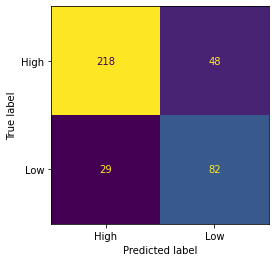

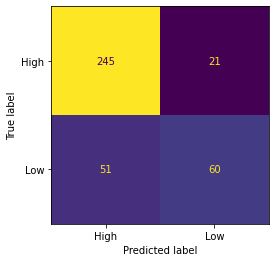

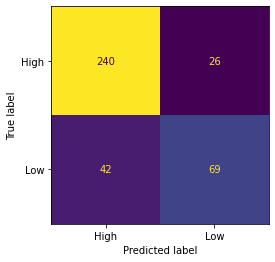

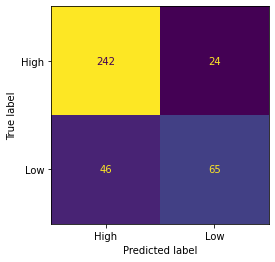

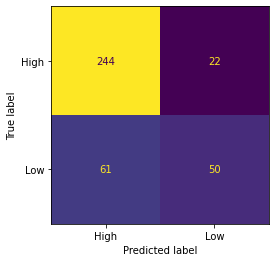

In [19]:
# Model evaluation including better-looking confusion matrices

from sklearn.metrics import plot_confusion_matrix
models = [decision_tree, svm, nn, random_forest, kNN]

for model in models:
    print(model)
    print_scores(y_test, model.predict(X_test), nn.predict_proba(X_test)[:,1])
    plot_confusion_matrix(model, X_test, y_test, colorbar=False)  

plt.show() 

In [26]:
# Feature importances of tree-based algorithms

decision_tree_imp = dict(zip(X_train.columns,decision_tree.feature_importances_))
decision_tree_imp_sorted = sorted(decision_tree_imp.items(), key=lambda kv: kv[1])
for feature in decision_tree_imp_sorted:
    print(feature)

print('---')
random_forest_imp = dict(zip(X_train.columns,random_forest.feature_importances_))
random_forest_imp_sorted = sorted(random_forest_imp.items(), key=lambda kv: kv[1])
for feature in random_forest_imp_sorted:
    print(feature)


('organizer_ind', 0.0)
('n_pupils', 0.0)
('n_teachers', 0.0)
('f_staff_female', 0.0)
('f_staff_ped_degree', 0.0)
('f_staff_permanent', 0.0)
('mun_population', 0.0)
('mun_density', 0.0)
('mun_age', 0.0)
('f_mun_foreign', 0.0)
('f_girls', 0.02095008529174578)
('mun_income', 0.032015985811862366)
('organizer_mun', 0.04594457086193866)
('pupils_per_teacher', 0.10303079460978284)
('f_foreign', 0.19102049172081564)
('f_education', 0.6070380717038546)
---
('f_staff_female', 0.02244611428547632)
('mun_age', 0.024840973022818492)
('organizer_mun', 0.027909153303491245)
('mun_population', 0.028687239537416045)
('f_staff_permanent', 0.029506071361439186)
('mun_density', 0.03098645070781869)
('f_mun_foreign', 0.032374016651788046)
('n_teachers', 0.032762882780502746)
('f_girls', 0.03432900930804976)
('organizer_ind', 0.03621972793106229)
('f_staff_ped_degree', 0.04040364791983838)
('mun_income', 0.04138227505214575)
('n_pupils', 0.04158916505307384)
('pupils_per_teacher', 0.08584642381417065)
('f_

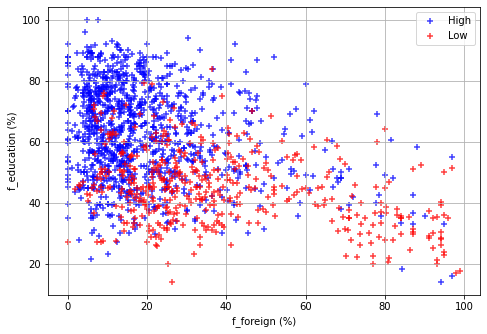

In [21]:
# Scatterplot of most important features

fig=plt.figure()
dataset_high = school_dataset[school_dataset['f_eligible']=='High']
dataset_low = school_dataset[school_dataset['f_eligible']=='Low']
ax = fig.add_axes([0,0,1,1])
ax.scatter(dataset_high['f_foreign'], dataset_high['f_education'], c = 'b', marker='+', alpha=0.75, label = 'High')
ax.scatter(dataset_low['f_foreign'], dataset_low['f_education'], c = 'r',  marker='+', alpha=0.75, label = 'Low')
ax.set_xlabel('f_foreign (%)')
ax.set_ylabel('f_education (%)')
ax.set_title('')
ax.legend()
ax.grid(True)
plt.savefig('scatterplot.png')
plt.show()